# Multiple Linear Regression  Prediction

## Class Linear

In [4]:
import torch
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features=2, out_features=1)

In [5]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [6]:
model.state_dict()

OrderedDict([('weight', tensor([[ 0.3643, -0.3121]])),
             ('bias', tensor([-0.1371]))])

In [7]:
X=torch.tensor([[1.0, 3.0]])
yhat=model(X)
yhat

tensor([[-0.7090]], grad_fn=<AddmmBackward>)

In [8]:
#predictions for multiple samples
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(X)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)

## Custom Modules

In [9]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

# Multiple Linear Regression Training

## Cost function and Gradient Descent for Multiple Linear Regression

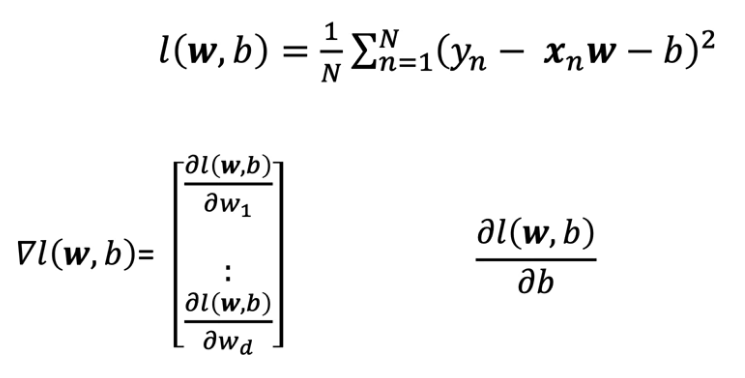

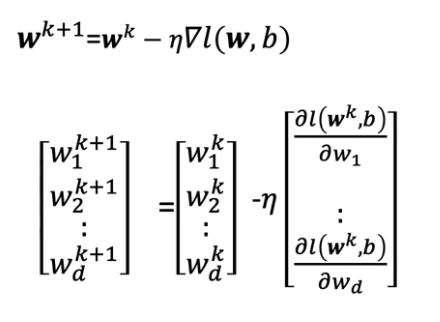

## Train the model in Pytorch

In [1]:
from torch import nn, optim
import torch

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
from torch.utils.data import Dataset, DataLoader

class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:, 0] = torch.arange(-1,1,0.1)
        self.x[:, 1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([ [1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w)+self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [7]:
data_set = Data2D()
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=data_set, batch_size=2)
model = LR(input_size=2, output_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [8]:
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

# Multiple output linear regression

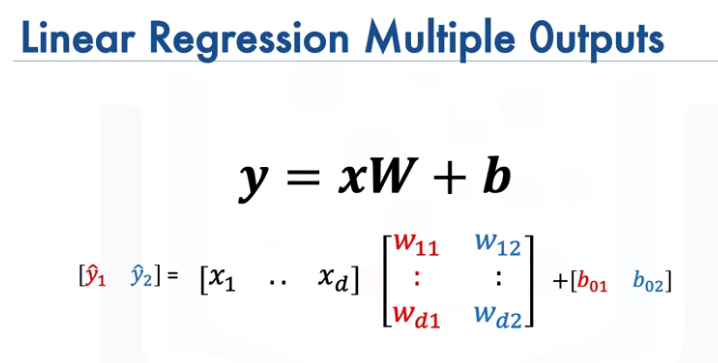

With M linear functions with d inputs:
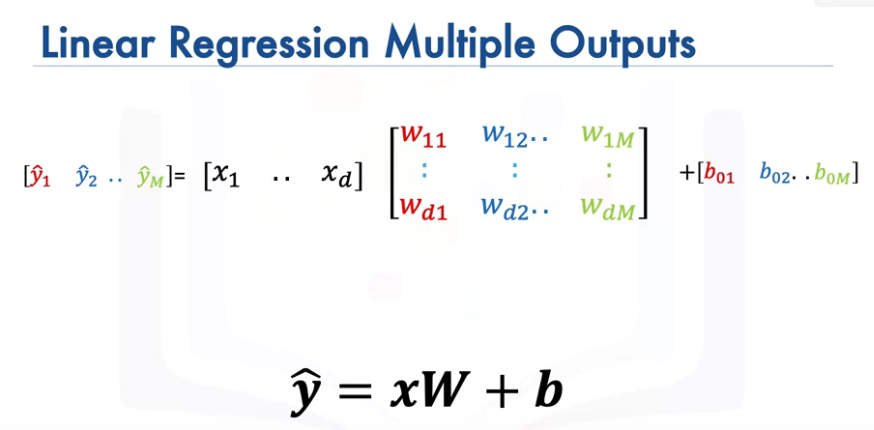

## Custom module

In [3]:
import torch.nn as nn
import torch
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [4]:
torch.manual_seed(1)
model = LR(input_size=2, output_size=2)

In [5]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121],
         [-0.1371,  0.3319]], requires_grad=True),
 Parameter containing:
 tensor([-0.6657,  0.4241], requires_grad=True)]

In [6]:
x=torch.tensor([[1.0, 2.0]])
yhat=model(x)
yhat

tensor([[-0.9256,  0.9508]], grad_fn=<AddmmBackward>)

In [7]:
#with 2 columns and 3 rows
X=torch.tensor([[1.0, 1.0], [1.0,2.0], [1.0, 3.0]])
Yhat = model(X)
Yhat

tensor([[-0.6135,  0.6189],
        [-0.9256,  0.9508],
        [-1.2377,  1.2827]], grad_fn=<AddmmBackward>)

# Multiple output linear regression training

In [8]:
from torch.utils.data import Dataset, DataLoader

class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20,2)
        self.x[:, 0] = torch.arange(-1,1,0.1)
        self.x[:, 1] = torch.arange(-1,1,0.1)
        self.w = torch.tensor([ [1.0, -1.0], [1.0, -1.0]])
        self.b = torch.tensor([[1.0, -1.0]])
        self.f = torch.mm(self.x, self.w)+self.b
        self.y = self.f + 0.1*torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [10]:
from torch import nn, optim

data_set = Data2D()
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=data_set, batch_size=1)
model = LR(input_size=2, output_size=2)
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [11]:
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

# Linear Classifier and Logistic Regression

# Logisitic Regression: Prediction

## Logistic function

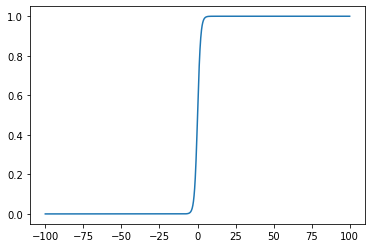

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

z = torch.arange(-100, 100, 0.1).view(-1, 1)
sig = nn.Sigmoid()
yhat = sig(z)
plt.plot(z.numpy(), yhat.numpy())

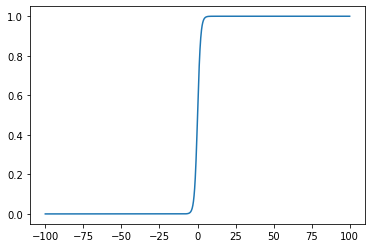

In [4]:
import torch

z = torch.arange(-100, 100, 0.1).view(-1, 1)
yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

[torch.nn.Sigmoid vs torch.sigmoid - PyTorch Forums](https://discuss.pytorch.org/t/torch-nn-sigmoid-vs-torch-sigmoid/57691/3)

> `torch.nn.Sigmoid` (note the capital “S”) is a _class_. When you  
> instantiate it, you get a _function object_, that is, an object that you  
> can call like a function. In contrast, `torch.sigmoid` is a function.

## nn.Sequential

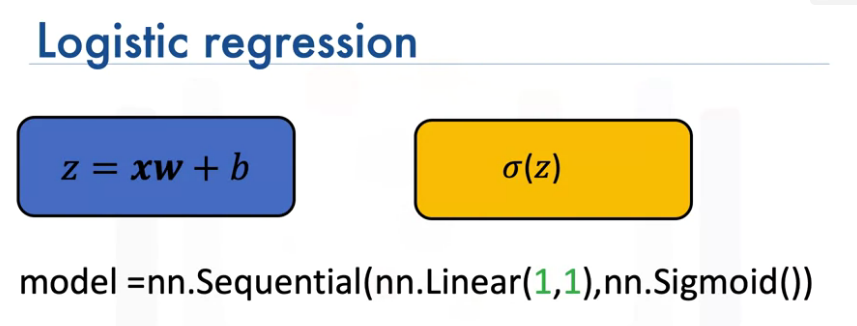

## nn.Module

In [6]:
import torch.nn as nn

class logistic_regression(nn.Module):
    def __init__(self, in_size):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(in_size, 1)
    def forward(self, x):
        z = torch.sigmoid(self.linear(x))
        return z

In [11]:
custom_model = logistic_regression(1)
x = torch.tensor([[1.0]])

yhat = custom_model(x)
yhat

tensor([[0.4129]], grad_fn=<SigmoidBackward>)

In [12]:
sequential_model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())
sequential_model(x)

tensor([[0.2848]], grad_fn=<SigmoidBackward>)

## Making a prediction

In [13]:
print(list(custom_model.parameters()))

[Parameter containing:
tensor([[-0.0805]], requires_grad=True), Parameter containing:
tensor([-0.2714], requires_grad=True)]


In [14]:
print((list(sequential_model.parameters())))

[Parameter containing:
tensor([[-0.3951]], requires_grad=True), Parameter containing:
tensor([-0.5257], requires_grad=True)]


In [17]:
x=torch.tensor([[1.0], [2.0]])
custom_model(x)

tensor([[0.4129],
        [0.3936]], grad_fn=<SigmoidBackward>)

In [18]:
sequential_model(x)

tensor([[0.2848],
        [0.2115]], grad_fn=<SigmoidBackward>)

## Multidimensional Logistic Regression

In [19]:
custom_2D_model = logistic_regression(2)
sequential_2D_model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

In [20]:
print(list(sequential_2D_model.parameters()))

[Parameter containing:
tensor([[-0.3360,  0.6080]], requires_grad=True), Parameter containing:
tensor([0.2654], requires_grad=True)]


In [22]:
x=torch.tensor([[1.0, 2.0]])
yhat = sequential_2D_model(x)
yhat

tensor([[0.7587]], grad_fn=<SigmoidBackward>)

# Logistic Regression Cross Entropy Loss

In [7]:
import torch
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3*self.x+1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len
    
dataset = Data()

In [8]:
from torch.utils.data import DataLoader

trainloader = DataLoader(dataset=dataset, batch_size=1)

In [10]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())

In [11]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [12]:
criterion = nn.BCELoss()

In [13]:
for epoch in range(100):
    for x, y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()